      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39          4              0           0       0   
1        0   46          2              0           0       0   
2        1   48          1              1          20       0   
3        0   61          3              1          30       0   
4        0   46          3              1          23       0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50          1              1           1       0   
4234     1   51          3              1          43       0   
4235     0   48          2              1          20       0   
4236     0   44          1              1          15       0   
4237     0   52          2              0           0       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0      195  106.0   70.0  26.97   
1                   0             0         0      250  121.0

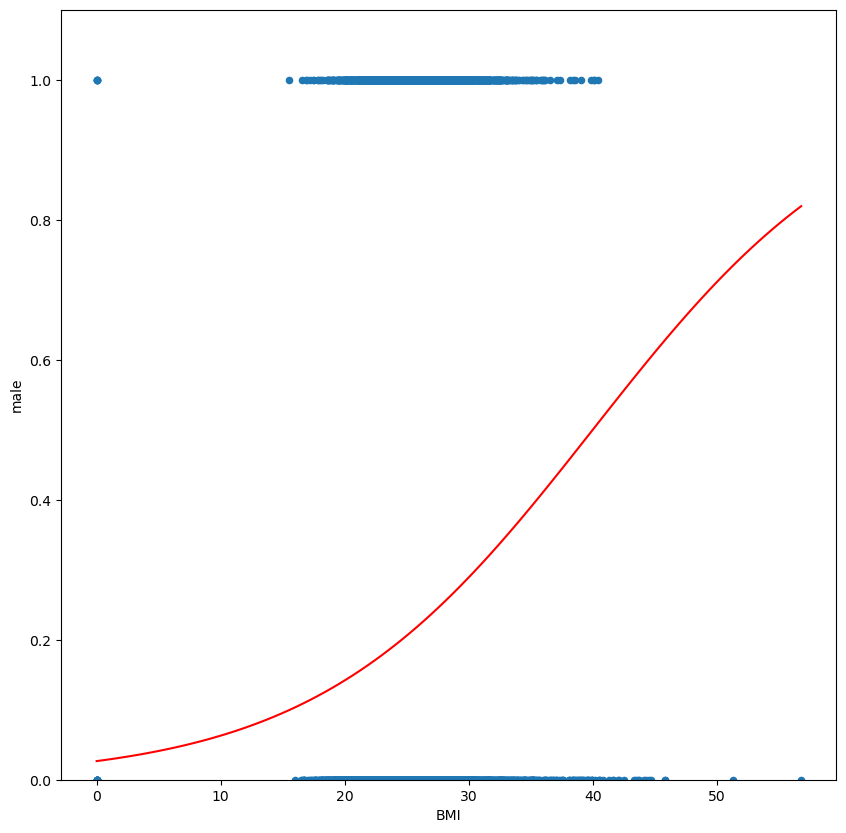

In [65]:
import pandas as pd
#graficos informativos y estadisticos con mejor diseño
import seaborn as sns
#funciones matematicas , algebraicas, vectores y matrices
import numpy as np
#genera diversos tipos de graficos
import matplotlib.pyplot as plt
# %matplotlib inline
#from sklearn.linear_model import LinearRegression   # saber valores optimos
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math
from math import e
%matplotlib inline

#from sklearn import LogisticRegression
import datetime

datos= pd.read_csv ("framingham.csv",sep=",") # lee un archivo separado por comas (,)
print(datos)
datos[["BMI","male"]].head(2)

w = 0.09
b = -3.6
# despues de hacer el modelos (se explica más adelante)
# intercepto (b): [-3.68596089]
# pendiente (w): [[0.09351691]]
# puntos de la recta
x = np.linspace(0,datos['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
datos.plot.scatter(x='BMI',y='male')
plt.plot(x, y, '-r')
plt.ylim(0,datos['male'].max()*1.1)
# plt.grid()
plt.show()

<Axes: xlabel='BMI', ylabel='male'>

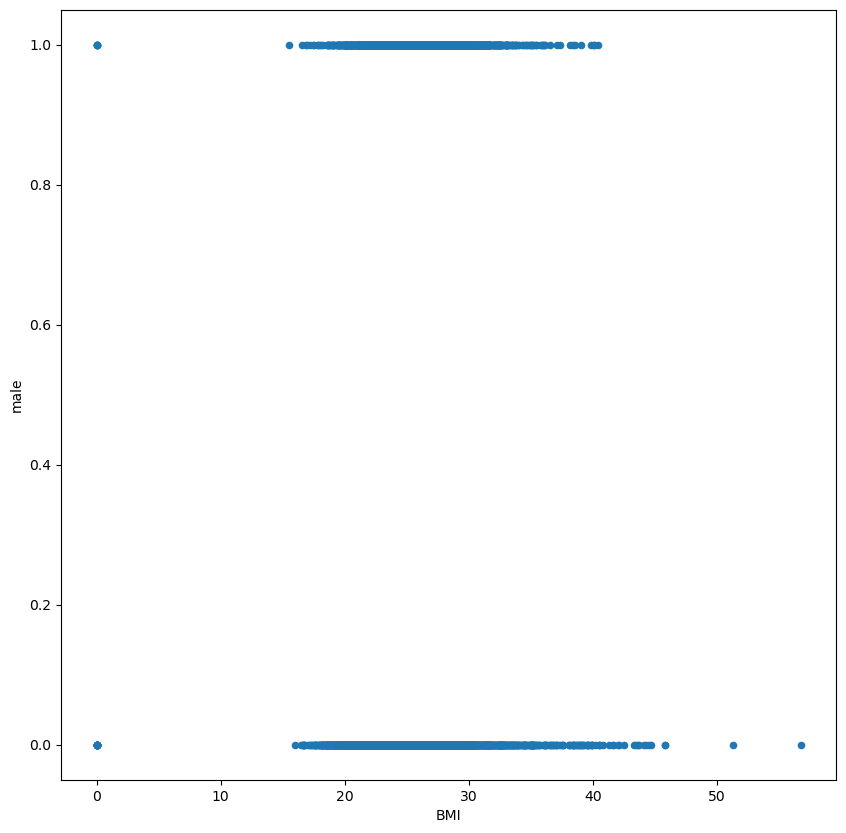

In [66]:
datos[["BMI","male"]].plot.scatter(x='BMI',y='male')

In [67]:
# calculo de las predicciones
datos['sigmoid'] = 1/(1+np.exp(-(datos['BMI']*w+b)))

# calculo de la funcion de error
datos['loss_xi'] = -datos['male']*np.log(datos['sigmoid'])-(1-datos['male'])*np.log(1-datos['sigmoid'])
cost_j = datos['loss_xi'].mean()
cost_j

0.7933085131557676

In [68]:
# conocer el punto de interceptacion


# definiendo input y output
#X_train = np.array(datos['BMI']).reshape((-1, 1))
#Y_train = np.array(datos['male'])


# creando modelo
#model = LogisticRegression()
#prueba = model.fit(X_train, Y_train)

# imprimiendo parametros
#print(f"intercepto (b): {prueba.intercept_}")
#print(f"pendiente (w): {prueba.coef_}")


In [69]:
# describe la data y cuenta la data
print(datos.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.929920       0.494101     8.941482   
std       0.495022     8.572160     1.053018       0.500024    11.902399   
min       0.000000    32.000000     0.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4238.000000      4238.000000   4238.000000  4238.000000  4238.000000   
mean      0.029259         0.005899      0.310524     0.025720   233.928740   
std       0.168552         0.076587      0.462763     0.158316    51.169478   

In [70]:
# frecuencia de los datos en la columna
print(datos.groupby('BMI').size())
print(datos.groupby('male').size())

BMI
0.00     19
15.54     1
15.96     1
16.48     1
16.59     2
         ..
44.71     1
45.79     1
45.80     1
51.28     1
56.80     1
Length: 1364, dtype: int64
male
0    2419
1    1819
dtype: int64


/tmp/ipykernel_65496/2537407743.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos.drop([],1).hist()


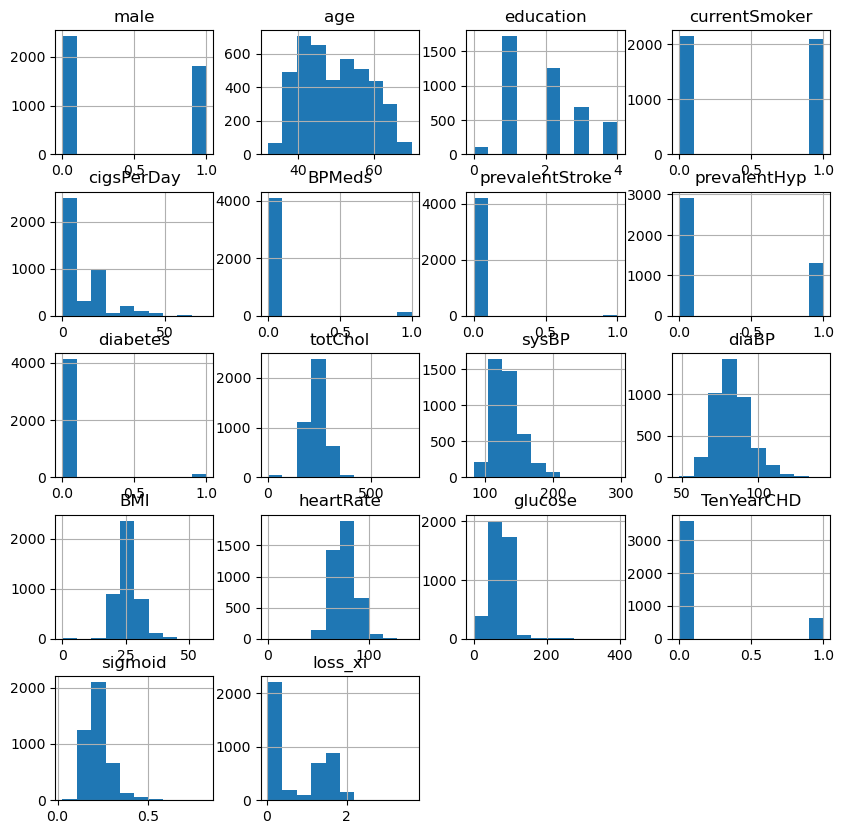

In [71]:
# histogramas que miden la mayor densidad del registro
plt.rcParams['figure.figsize']=[10.,10.]
datos.drop([],1).hist()
plt.show()

In [72]:
#cargar las variables en las columnas
import numpy as np
X=np.array(datos.drop(['diabetes'],1))
y=np.array(datos['diabetes'])
X.shape

/tmp/ipykernel_65496/1749105853.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(datos.drop(['diabetes'],1))


(4238, 17)

In [73]:
# se crea el modelo y se ajusta con fit
from sklearn import linear_model
model=linear_model.LogisticRegression()
model.fit(X,y)

/home/jcifue9/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
predicciones = model.predict(X)
print((predicciones)[0:4])

[0 0 0 0]


In [103]:
print(datos['diabetes'])

0       0
1       0
2       0
3       0
4       0
       ..
4233    0
4234    0
4235    0
4236    0
4237    0
Name: diabetes, Length: 4238, dtype: int64


In [104]:
print('precision de predicciones',model.score(X,y))

precision de predicciones 0.9846625766871165


In [105]:
v_size=0.20
seed = 7
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,y, test_size=v_size, random_state=seed)

In [106]:
# se compila el modelo con otro porcentaje en este caso 80 %
nombre="Regresion_Logitica"
kfold= model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cv_results= model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (nombre, cv_results.mean(), cv_results.std() )
print(msg)

Regresion_Logitica: 0.982596 (0.005351)


/home/jcifue9/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jcifue9/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [107]:
predicciones = model.predict(X_validation)
print(accuracy_score(Y_validation, predicciones))

0.9905660377358491


In [108]:
# report de resultados del modelo
print(confusion_matrix(Y_validation,predicciones))

[[837   0]
 [  8   3]]


In [112]:
# reporte de clasificacion
print(classification_report(Y_validation, predicciones))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       837
           1       1.00      0.27      0.43        11

    accuracy                           0.99       848
   macro avg       1.00      0.64      0.71       848
weighted avg       0.99      0.99      0.99       848

